# 사전 준비
data폴더의 알약 이미지들을 복사해서 train과 test로 분리하여 2차 테스트

In [ ]:
import os
import random
import shutil

# 경로 설정
source_dir = r"./drive/MyDrive/data"
train_dir = r"./drive/MyDrive/data/train"
test_dir = r"./drive/MyDrive/data/test"

# 폴더 내의 파일들을 리스트로 저장
folders = os.listdir(source_dir)

# train, test 폴더 생성
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# 각 폴더에 대해 데이터 분리
for folder in folders:
    folder_path = os.path.join(source_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    # png 파일 분리
    png_files = []
    for file in os.listdir(folder_path):
        if file.lower().endswith(".png"):
            png_files.append(file)

    # 파일 리스트를 무작위로 섞음
    random.shuffle(png_files)

    # 폴더 내의 하위 폴더 생성
    train_folder_path = os.path.join(train_dir, folder)
    test_folder_path = os.path.join(test_dir, folder)
    os.makedirs(train_folder_path, exist_ok=True)
    os.makedirs(test_folder_path, exist_ok=True)

    # 학습용 데이터 개수 계산
    train_count = int(len(png_files) * 0.7)

    # 학습용 데이터 잘라내기 및 이동
    for file in png_files[:train_count]:
        src_path = os.path.join(folder_path, file)
        dst_path = os.path.join(train_folder_path, file)
        shutil.move(src_path, dst_path)

    # 테스트용 데이터 잘라내기 및 이동
    for file in png_files[train_count:]:
        src_path = os.path.join(folder_path, file)
        dst_path = os.path.join(test_folder_path, file)
        shutil.move(src_path, dst_path)

print("데이터 분리가 완료되었습니다.")

KeyboardInterrupt: ignored

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,805 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and di

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
#plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [5]:
  import torch
  import torch.nn as nn
  import torch.optim as optim
  import os

  import torchvision
  from torchvision import datasets, models, transforms

  import numpy as np
  import time


  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [6]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './drive/MyDrive/pill_data'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 2721
테스트 데이터셋 크기: 1167
클래스: ['Gelusam Tab', 'Myambutol Tab', 'Timing Tab']


In [7]:
print(class_names)

['Gelusam Tab', 'Myambutol Tab', 'Timing Tab']


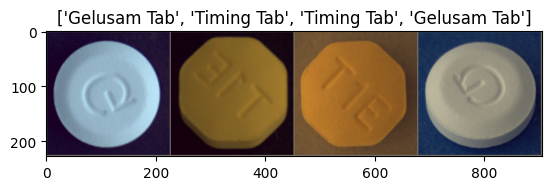

In [8]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [9]:
from torchvision.models.resnet import ResNet18_Weights

model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 100MB/s]


In [10]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 0.2012 Acc: 92.6865% Time: 463.4564s
#1 Loss: 0.0931 Acc: 97.6479% Time: 477.6387s
#2 Loss: 0.1180 Acc: 96.7659% Time: 491.7029s
#3 Loss: 0.0643 Acc: 97.9419% Time: 505.6795s
#4 Loss: 0.0549 Acc: 98.2359% Time: 519.6272s
#5 Loss: 0.0331 Acc: 98.8975% Time: 533.5770s
#6 Loss: 0.0200 Acc: 99.3017% Time: 547.5330s
#7 Loss: 0.0092 Acc: 99.8162% Time: 561.4726s
#8 Loss: 0.0024 Acc: 99.9632% Time: 575.5172s
#9 Loss: 0.0031 Acc: 100.0000% Time: 589.5437s
#10 Loss: 0.0023 Acc: 100.0000% Time: 603.5142s
#11 Loss: 0.0014 Acc: 100.0000% Time: 617.4482s
#12 Loss: 0.0014 Acc: 100.0000% Time: 631.3831s
#13 Loss: 0.0019 Acc: 100.0000% Time: 645.3179s
#14 Loss: 0.0010 Acc: 100.0000% Time: 659.3232s
#15 Loss: 0.0010 Acc: 100.0000% Time: 673.2981s
#16 Loss: 0.0010 Acc: 100.0000% Time: 687.2437s
#17 Loss: 0.0010 Acc: 100.0000% Time: 701.2268s
#18 Loss: 0.0007 Acc: 100.0000% Time: 715.1852s
#19 Loss: 0.0007 Acc: 100.0000% Time: 729.1719s
#20 Loss: 0.0005 Acc: 100.0000% Time: 743.1454s
#21 Loss: 0

In [11]:
# 모델 평가
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0
    correct = 0
    false = 0
    i = 0 # 100개만 테스트 하기 위해
    for inputs, labels in test_dataloader:

        if i==1000:
          break
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        #print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        # 예측 결과 / 실제 정답
        if class_names[preds[0]] == class_names[labels.data[0]]:
          correct += 1
        else:
          false += 1
        imshow(inputs.cpu().data[0], title=f'{i} : [predict: {class_names[preds[0]]}/result: {class_names[labels.data[0]]}]')
        i+=1

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))
    print(f'correct : {correct} false : {false}')

만들어진 인공지능 모델 다운

In [ ]:
!pwd

/content


In [12]:
import torch

# ResNet34 모델 정의와 학습

# 모델 저장 => 드라이브에
torch.save(model.state_dict(), 'resnet18_test.pth')


인공지능 모델 로드하는 방법

In [ ]:
import torch.nn as nn

# 모델 생성 & 로드
model = models.resnet18()

model.load_state_dict(torch.load('resnet18_test4.pth'), strict=False)

# Modify the last layer and perform other operations on the model
# ...


# 마지막 레이어 수정
num_classes = 3  # 원하는 출력 클래스 수
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 모델 평가 모드로 설정
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [1]:
# 모델 정확도 검증
from PIL import Image
import torch.nn.functional as F

folder_dir = r'./drive/MyDrive/model_test_images'
image_lists = os.listdir(folder_dir)

print(image_lists)


for i in range(len(image_lists)):
  image = Image.open('./drive/MyDrive/model_test_images/' + image_lists[i])
  image = transforms_test(image).unsqueeze(0).to(device)
  model.to(device)  # 모델을 동일한 디바이스로 이동시킴

  with torch.no_grad():
      outputs = model(image)
      probabilities = F.softmax(outputs, dim=1)  # 예측 결과를 확률로 변환
      _, preds = torch.max(outputs, 1)
      predicted_class = class_names[preds[0]]
      predicted_prob = probabilities[0, preds[0]].item()  # 예측된 클래스의 확률 값

  imshow(image.cpu().data[0], title=f'predict_result: {predicted_class} (percentage: {predicted_prob:.2f})')

NameError: ignored